## Monster Truck or Limousine

We are building a platform for a purchaser who resells cars to monster truck shows and limousine dealerships. They need information on vehicle pricing, color and drivetrain in order to create a marketing plan for their inventory.

To define the client needs,

A typical vehicle for a limousine is a monochrome two-wheel drive vehicle, or a monochrome 4x4 vehicle.
A typical vehicle for a monster truck is a color 4x4 vehicle.
A third variation is a monster limo - a monochrome 4x4 vehicle.

Users on the platform need to be able to 

1) Learn about pricing for monochrome vs. color vehicles
2) Filter via checkbox for 4x4 vehicles

## Process

The dataset provided will be from the "vehicles_us.csv" file, available on GitHub

#### The data will be and categorized as below 

    1) Monochrome (Black or White) Vehicles - with 'Monochrome' indicator
    2) Color (non-Monochrome) Vehicles - with 'Color' indicator
    3) 4x4 Vehicles - with 'Yes' / 'No indicator
    4) A price range indicator has been added to allow users to select by price
 

## Analysis

A simple statistical analysis of mean price for each of the vehicle groupings.

In [49]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import plotly.express as px

In [50]:
# Import data set

df_vehiclesus = pd.read_csv('/Users/josemelgarejo-mini/Documents/GitHub/tripletenrepo_sd/vehicles_us.csv')

In [51]:
# Call info on data set to evaluate data quality

df_vehiclesus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [52]:
# Create columns for monochrome and color using paint_color column

df_vehiclesus['Monochrome'] = 'Color'
df_vehiclesus.loc[df_vehiclesus['paint_color'].isin(['black', 'white']), 'Monochrome'] = 'Monochrome'

In [53]:
# Eliminate NaN values for 4wd assuming 1=4x4 or "Yes" and 0=2wd or "No"

df_vehiclesus['is_4wd'].fillna('0', inplace=True)

In [54]:
for index, row in df_vehiclesus.iterrows():
    if row['is_4wd'] == 1.0:
        df_vehiclesus.loc[index, '4x4'] = 'Yes'
    else:
        df_vehiclesus.loc[index, '4x4'] = 'No'


In [55]:
# Create mileage categories to sort via mileage to 100k

for index, row in df_vehiclesus.iterrows():
    if row['odometer'] < 25000:
        df_vehiclesus.loc[index, 'Mileage'] = '<20k'
    elif row['odometer'] >= 25000 and row['odometer'] < 50000:
        df_vehiclesus.loc[index, 'Mileage'] = '25k - 50k'
    elif row['odometer'] >= 50000 and row['odometer'] < 75000:
        df_vehiclesus.loc[index, 'Mileage'] = '50k - 75k'
    elif row['odometer'] >= 75000 and row['odometer'] < 100000:
        df_vehiclesus.loc[index, 'Mileage'] = '75k - 100k'
    else:
        df_vehiclesus.loc[index, 'Mileage'] = '>100k'


In [56]:
# Check header to sample data

df_vehiclesus.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,Monochrome,4x4,Mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,Color,Yes,>100k
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,Monochrome,Yes,75k - 100k
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,Color,No,>100k
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,Color,No,>100k
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,Monochrome,No,75k - 100k


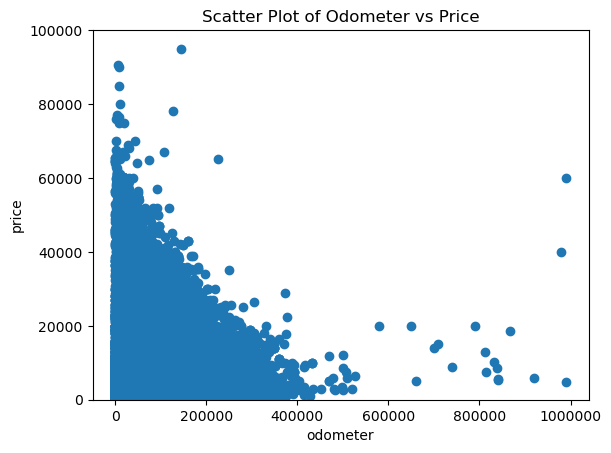

In [57]:
plt.scatter(df_vehiclesus['odometer'], df_vehiclesus['price'])

# Scatter Plot Parameters
plt.xlabel('odometer')
plt.ylabel('price')
plt.title('Scatter Plot of Odometer vs Price')
plt.ylim(0,100000)
plt.ticklabel_format(style='plain', axis='x')

plt.show()


In [58]:
# Using plotly express

fig = px.scatter(df_vehiclesus, x='odometer', y='price')

fig.update_xaxes(title='Odometer')
fig.update_yaxes(title='Price')
fig.update_layout(title='Scatter Plot of Odometer vs Price')

fig.update_yaxes(range=[0, 100000])

fig.show()

In [59]:
mean_price = df_vehiclesus['price'].mean()

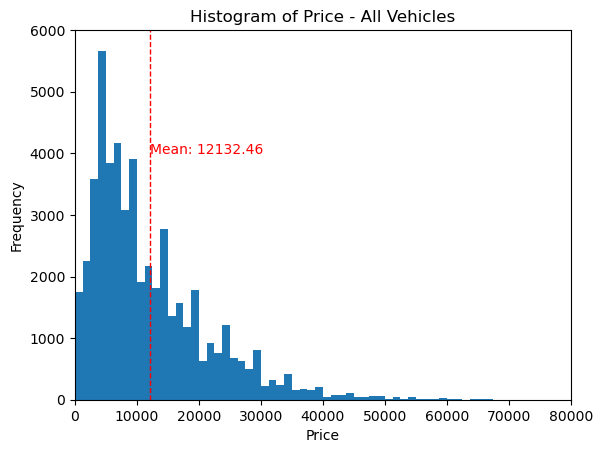

In [60]:
plt.hist(df_vehiclesus['price'], bins=300)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price - All Vehicles')
plt.xlim(0, 80000)
plt.ylim(0, 6000)
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_price, 4000, f"Mean: {mean_price:.2f}", color='r',)

# Display the plot
plt.show()

In [61]:
df_monochrome = df_vehiclesus[df_vehiclesus['Monochrome'] == 'Monochrome']
df_color = df_vehiclesus[df_vehiclesus['Monochrome'] == 'Color']

In [62]:
# Calculate mean pricing for monochrome and color vehicles

color_mean = df_color['price'].mean()
monochrome_mean = df_monochrome['price'].mean()
print("The mean for color vehicles is:", color_mean)
print("The mean for monochrome vehicles is:", monochrome_mean)

The mean for color vehicles is: 11168.43843923796
The mean for monochrome vehicles is: 13971.410304158908


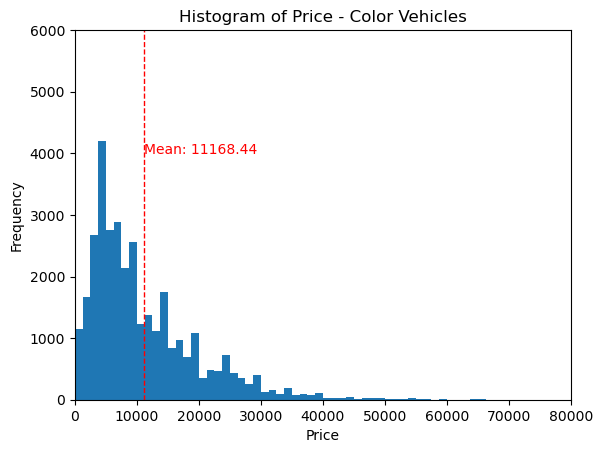

In [63]:
plt.hist(df_color['price'], bins=300)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price - Color Vehicles')
plt.xlim(0, 80000)
plt.ylim(0, 6000)
plt.axvline(color_mean, color='r', linestyle='dashed', linewidth=1)
plt.text(color_mean, 4000, f"Mean: {color_mean:.2f}", color='r',)

# Display the plot
plt.show()

In [71]:
# In plotly express

fig = px.histogram(df_color, x='price', nbins=300)

# Update labels and title
fig.update_xaxes(title_text='Price')
fig.update_yaxes(title_text='Frequency')
fig.update_layout(title_text='Histogram of Price - Color Vehicles')
fig.update_xaxes(range=[0, 80000])
fig.update_yaxes(range=[0, 6000])
fig.add_shape(type="line", x0=color_mean, y0=0, x1=color_mean, y1=6000,
              line=dict(color="red", width=1, dash="dash"))
fig.add_annotation(x=color_mean, y=4000, text=f"Mean: {color_mean:.2f}", showarrow=False,
                   font=dict(color="red"))

# Display the plot
fig.show()

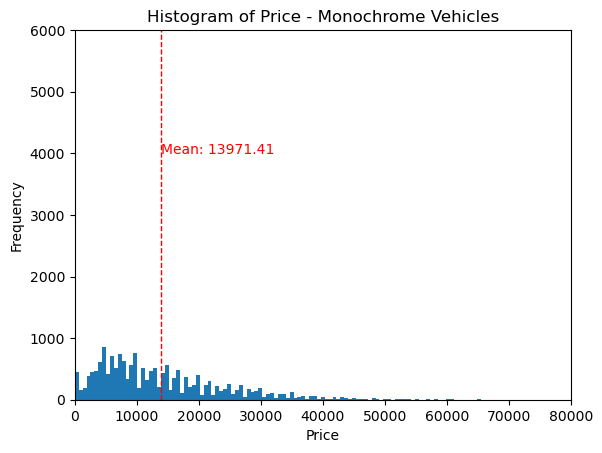

In [64]:
plt.hist(df_monochrome['price'], bins=300)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price - Monochrome Vehicles')
plt.xlim(0, 80000)
plt.ylim(0, 6000)
plt.axvline(monochrome_mean, color='r', linestyle='dashed', linewidth=1)
plt.text(monochrome_mean, 4000, f"Mean: {monochrome_mean:.2f}", color='r',)

# Display the plot
plt.show()

In [72]:
# In plotly express

fig = px.histogram(df_monochrome, x='price', nbins=300)

# Update labels and title
fig.update_xaxes(title_text='Price')
fig.update_yaxes(title_text='Frequency')
fig.update_layout(title_text='Histogram of Price - Monochrome Vehicles')
fig.update_xaxes(range=[0, 80000])
fig.update_yaxes(range=[0, 6000])
fig.add_shape(type="line", x0=color_mean, y0=0, x1=color_mean, y1=6000,
              line=dict(color="red", width=1, dash="dash"))
fig.add_annotation(x=monochrome_mean, y=4000, text=f"Mean: {monochrome_mean:.2f}", showarrow=False,
                   font=dict(color="red"))

# Display the plot
fig.show()

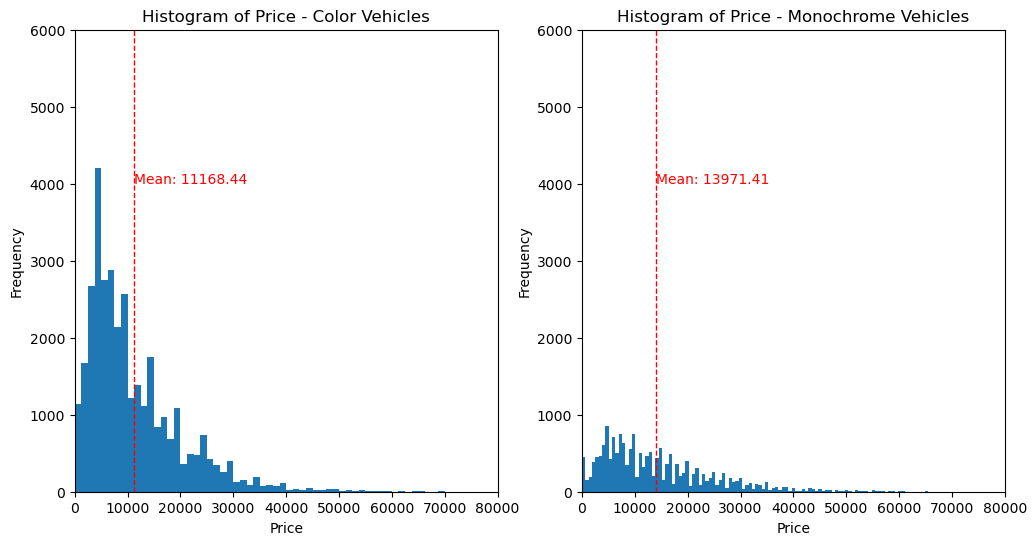

In [65]:
# Plot side-by-side comparison of color and monochrome vehicles

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# HISTOGRAM - COLOR VEHICLES
ax1.hist(df_color['price'], bins=300)

# LABELS FOR COLOR VEHICLES
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Price - Color Vehicles')
ax1.set_xlim(0, 80000)
ax1.set_ylim(0, 6000)
ax1.axvline(color_mean, color='r', linestyle='dashed', linewidth=1)
ax1.text(color_mean, 4000, f"Mean: {color_mean:.2f}", color='r')

# HISTOGRAM - MONOCHROME VEHICLES
ax2.hist(df_monochrome['price'], bins=300)

# LABELS FOR MONOCHROME VEHICLES
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Price - Monochrome Vehicles')
ax2.set_xlim(0, 80000)
ax2.set_ylim(0, 6000)
ax2.axvline(monochrome_mean, color='r', linestyle='dashed', linewidth=1)
ax2.text(monochrome_mean, 4000, f"Mean: {monochrome_mean:.2f}", color='r')

plt.show()

In [66]:
# Calculate the mean for color and monochrome by drivetrain

color_4x4_mean = (df_color[df_color['4x4'] == 'Yes']['price']).mean()
color_2wd_mean = (df_color[df_color['4x4'] == 'No']['price']).mean()
monochrome_4x4_mean = (df_monochrome[df_monochrome['4x4'] == 'Yes']['price']).mean()
monochrome_2wd_mean = (df_monochrome[df_monochrome['4x4'] == 'No']['price']).mean()

print("The average color 4x4 price:", color_4x4_mean)
print("The average color 2WD price:", color_2wd_mean)
print("The average monochrome 4x4 price:", monochrome_4x4_mean)
print("The average monochrome 2WD price:", monochrome_2wd_mean)


The average color 4x4 price: 14128.991063671341
The average color 2WD price: 8471.641096664782
The average monochrome 4x4 price: 17349.788115880736
The average monochrome 2WD price: 10104.449473556819


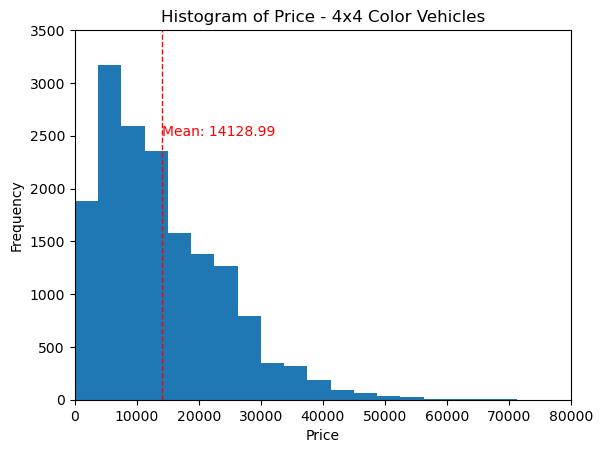

In [67]:
# Plot histogram of color 4x4 by price

plt.hist(df_color[df_color['4x4'] == 'Yes']['price'], bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price - 4x4 Color Vehicles')
plt.xlim(0, 80000)
plt.ylim(0, 3500)
plt.axvline(color_4x4_mean, color='r', linestyle='dashed', linewidth=1)
plt.text(color_4x4_mean, 2500, f"Mean: {color_4x4_mean:.2f}", color='r',)

plt.show()

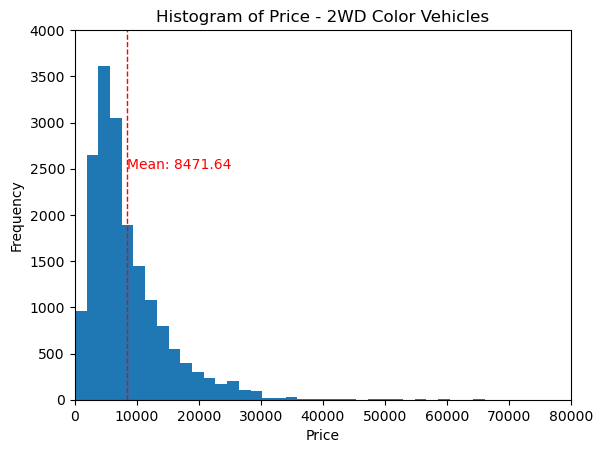

In [68]:
# Plot histogram of color 2WD by price

plt.hist(df_color[df_color['4x4'] == 'No']['price'], bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price - 2WD Color Vehicles')
plt.xlim(0, 80000)
plt.ylim(0, 4000)
plt.axvline(color_2wd_mean, color='r', linestyle='dashed', linewidth=1)
plt.text(color_2wd_mean, 2500, f"Mean: {color_2wd_mean:.2f}", color='r',)

plt.show()

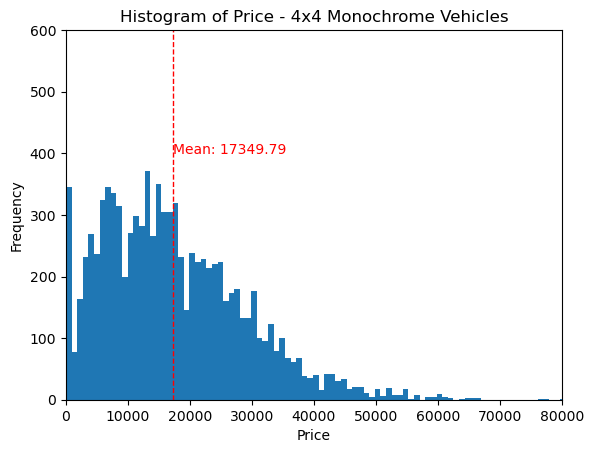

In [69]:
# Plot histogram of monochrome 4x4 by price

plt.hist(df_monochrome[df_monochrome['4x4'] == 'Yes']['price'], bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price - 4x4 Monochrome Vehicles')
plt.xlim(0, 80000)
plt.ylim(0, 600)
plt.axvline(monochrome_4x4_mean, color='r', linestyle='dashed', linewidth=1)
plt.text(monochrome_4x4_mean, 400, f"Mean: {monochrome_4x4_mean:.2f}", color='r',)

plt.show()

Text(10104.449473556819, 1000, 'Mean: 10104.45')

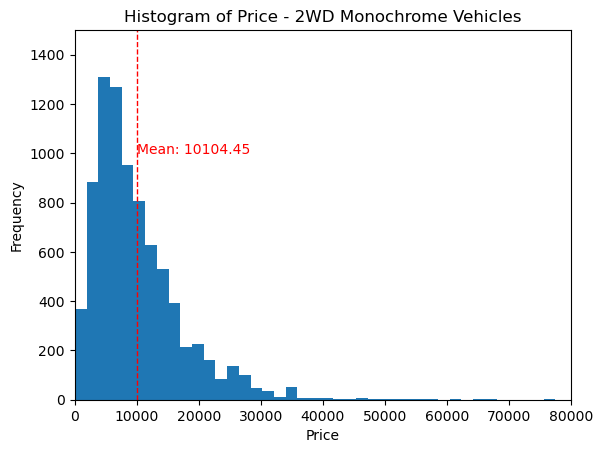

In [70]:
# Plot histogram of monochrome 2WD by price

plt.hist(df_monochrome[df_monochrome['4x4'] == 'No']['price'], bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price - 2WD Monochrome Vehicles')
plt.xlim(0, 80000)
plt.ylim(0, 1500)
plt.axvline(monochrome_2wd_mean, color='r', linestyle='dashed', linewidth=1)
plt.text(monochrome_2wd_mean, 1000, f"Mean: {monochrome_2wd_mean:.2f}", color='r',)